## Scipy

### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
### Task:
### 1.fitting it to the periodic function
### 2.plot the fit
### Data
### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature (C)')

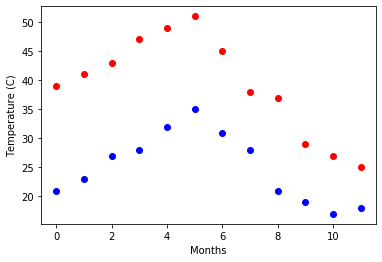

In [3]:
months = np.arange(12)
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel("Months")
plt.ylabel("Temperature (C)")

### Fitting a periodic function using scipy|

In [4]:
from scipy import optimize

In [5]:
def yearly_temp(time,avg,ampl,time_offset):
    return (avg
            + ampl * np.cos((time + time_offset) * 2 * np.pi / time.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      temp_max)
res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      temp_min)
    

### Plotting the curve

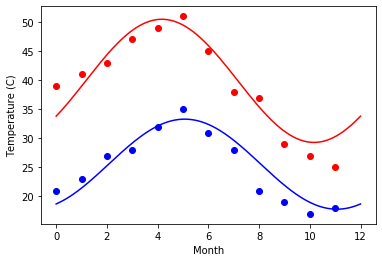

In [6]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temp(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')

plt.show()

## Matplotlib Assignment

### This assignment is for visualization using matplotlib:
### data to use:
### url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
### titanic = pd.read_csv(url)
### Charts to plot:
### 1. Create a pie chart presenting the male/female proportion


In [7]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [8]:
titanic = pd.read_csv(url)

In [9]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
data=titanic["sex"].value_counts()
data

male      843
female    466
Name: sex, dtype: int64

In [11]:
data.values.tolist()

[843, 466]

In [12]:
data.index.values.tolist()

['male', 'female']

In [13]:
colors=['r','y']

Text(0.5, 1.0, 'Male/Female proportion')

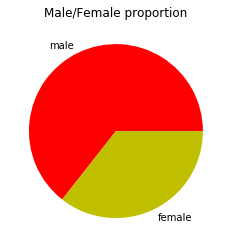

In [14]:
plt.pie(data.values.tolist(),labels=data.index.values.tolist(),colors=colors)
plt.title("Male/Female proportion")

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [15]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
gender = titanic['sex'].astype('category')
gender = gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

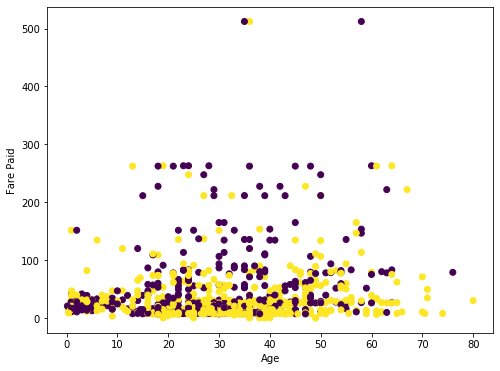

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'], titanic['fare'], c = gender)
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()